# Descripción del Proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde **abrir 200 pozos nuevos de petróleo**.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica *bootstrapping*.

# Inicialización 

In [1]:
#carguemos las librerias que vamos a necesitar 
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Carga de datos 

In [2]:
#importemos las librerías con las que vamos a trabajar 
region_1 = pd.read_csv('./geo_data_0.csv')
region_2 = pd.read_csv('./geo_data_1.csv')
region_3 = pd.read_csv('./geo_data_2.csv')

# Revisión de Datos

### Empecemos con los datos de la Región 1

In [3]:
region_1.sample(10)

,id,f0,f1,f2,product
65761,yYPkd,0.836576,-0.484228,2.156219,54.117461
9745,5ov0j,2.050254,0.444440,2.508991,79.764349
5430,vocfy,0.418677,0.881317,4.175317,124.560362
33234,vRifo,0.067791,0.039003,8.334713,172.992866
6474,IhZCy,1.866289,0.331278,0.015912,154.776051
88098,Kg3T1,-0.941081,0.370340,-1.537207,7.468789
7803,QuTil,-0.077822,1.080936,2.687598,106.152212
30162,4ROlA,0.275623,1.255452,7.583927,81.063672
78343,x3P5m,0.161109,-0.143798,0.546711,34.266062
11561,MhKi4,0.303441,-0.467141,0.885321,88.703565


In [4]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Los tipos de datos son correctos y no parece haber valores ausentes

In [5]:
region_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
region_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
print(region_1.duplicated().sum())

0


In [8]:
region_1['product'].value_counts()

product
105.280062    1
122.799517    1
61.817308     1
37.155071     1
73.090084     1
             ..
154.694803    1
79.818082     1
138.609486    1
62.540393     1
149.633246    1
Name: count, Length: 100000, dtype: int64

No observamos problemas de tipos de datos ni valores ausentes. Sin embargo si observamos valores en 0, hay que decidir como tratarlos, no sabemos si se trata de un error o si efectivamente el valor es 0 

### Revisemos los datos de la Región 2

In [9]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
region_2.sample(10)

,id,f0,f1,f2,product
91134,7LPpp,-2.654971,-1.362390,4.002011,110.992147
52271,yXCJc,0.886096,-1.654339,2.993357,80.859783
64558,m0gLV,-1.338727,-15.186125,3.004374,84.038886
57383,0PQSv,-5.686084,-11.280720,1.998386,57.085625
25369,2u1rS,-12.041228,-9.866543,0.004675,3.179103
78913,jDFk4,2.531898,-6.601638,-0.000304,0.000000
10571,rDjas,6.601805,-1.525469,1.998751,53.906522
17082,kXiFu,11.605640,-4.170471,4.002754,107.813044
24448,gGLsY,-16.900146,-4.833913,4.005566,110.992147
32549,53YaT,19.257673,11.571248,2.000487,53.906522


In [11]:
region_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [12]:
region_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
print(region_2.duplicated().sum())

0


In [14]:
region_2['product'].value_counts()

product
53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: count, dtype: int64

Al igual que con la region 1 , en la region 2 encontramos valores en 0, hay que decidir como tratarlos. 

### Revisemos los datos de la Región 3

In [15]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
region_3.sample(10)

,id,f0,f1,f2,product
66370,AeFlR,-5.033532,-1.848094,-5.267990,76.979577
16833,VfNFB,-0.000535,-1.243623,3.178987,115.119093
12533,YezDG,-0.202782,0.182960,4.262030,115.071730
30132,UThyn,-1.047243,1.224357,1.692742,134.440981
65158,6g6kG,-0.353515,0.646105,2.400701,31.270484
16697,Bh6Te,-0.321033,-0.146247,7.714463,157.913077
12351,SdsZb,0.161775,-2.892255,2.138900,102.745189
98518,pD6lA,-1.929630,2.522390,0.744850,79.240977
83652,6NFf3,1.410450,1.045912,-4.128800,34.571407
25129,HnAvz,0.000074,-1.695179,6.195546,140.592553


In [17]:
region_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [18]:
print(region_3.duplicated().sum())

0


No parece haber problemas con los tipos de datos, ni valores ausentes. 

He decidido dejar los valores, ya que considero que si la producción es 0, es porque esa locación no tiene reservas. Como era el único dato a "Corregir/Tratar" no es necesario tratar los datos. 

# Estandarización de Datos

In [19]:
#Creemos nuestros datos objetivo y nuestras caracteristicas 
reg1_features = region_1.drop(columns= ['product','id'])
reg1_target = region_1['product']

reg1_features.sample(10)

,f0,f1,f2
38093,1.886679,0.087039,11.548653
36530,0.727991,0.658104,9.064734
68941,0.650056,-0.218161,7.631404
84175,1.016515,-0.556433,5.402391
734,-0.003764,0.321727,9.931987
54285,1.253304,-0.438348,3.839715
14627,0.356766,0.960911,4.795726
10974,0.874989,0.268456,1.481332
33667,0.139063,0.835493,5.585493
21031,0.693003,0.750846,-3.837128


In [20]:
#vamos a crear nuestros conjuntos de datos para entrenamiento y validación 
#Primer dividamos los datos para entrenamiento y validación 
reg1_features_train, reg1_features_valid,reg1_target_train,reg1_target_valid = train_test_split(reg1_features, reg1_target, random_state=123, test_size=0.25)


print(reg1_features_train.shape)
print(reg1_target_train.shape)
print(reg1_features_valid.shape)
print(reg1_target_valid.shape)


(75000, 3)
(75000,)
(25000, 3)
(25000,)


In [21]:
#Guardamos las variables que vamos a estandarizar 
variables = ['f0','f1',	'f2']
#estandaricemos 
scaler = StandardScaler()
scaler.fit(reg1_features_train[variables])

reg1_features_train[variables] = scaler.transform(reg1_features_train[variables])
reg1_features_valid[variables] = scaler.transform(reg1_features_valid[variables])

In [22]:
print(reg1_features_train.sample(10))

             f0        f1        f2
42470 -1.683674 -0.280237 -0.242069
37084 -1.140626  1.540147  0.204123
45828 -1.511502  0.233503  0.086821
44030  0.001511  1.013425 -0.395847
65726  0.119535 -1.121580  1.706389
10400 -0.451830 -0.316127 -1.084259
30127 -0.466427  0.480372  2.487559
88922  0.505267 -2.050355 -0.482524
13670  1.733831 -0.546078  1.514040
10652  0.364510  0.725119 -0.074132


# Modelo de Regresión Linear 

In [23]:
#Creemos y probemos un modelo de regresión linear 
l_model = LinearRegression()
l_model.fit(reg1_features_train, reg1_target_train)
l_predict_valid = l_model.predict(reg1_features_valid)
reg_1_r = pd.DataFrame(l_predict_valid, index=reg1_target_valid.index).merge(reg1_target_valid, left_index=True,right_index=True).rename(columns={0: 'prediction', 'product': 'real'})


l_result = mean_squared_error(reg1_target_valid,l_predict_valid)**0.5

print('la raíz del error cuadratico medio es:', l_result)
print('El volumen medio de reservas predicho es:',l_predict_valid.mean())

la raíz del error cuadratico medio es: 37.64786282376177
El volumen medio de reservas predicho es: 92.54936189116306


## Repitamos los pasos para los otros 2 datasets 

In [24]:
#Creemos nuestros datos objetivo y nuestras caracteristicas para Region 2 
reg2_features = region_2.drop(columns= ['product','id'])
reg2_target = region_2['product']

reg2_features.sample(10)

,f0,f1,f2
12934,0.062415,-11.484615,1.994975
66753,5.816321,-6.085517,2.998399
92546,9.313469,-1.428464,4.999415
52865,-1.377464,-6.157883,5.005881
70618,16.517162,-2.222795,3.002782
93905,8.068190,-1.236917,2.003193
38447,-11.609816,-8.280135,0.995571
71436,5.000105,-8.392092,-0.011946
98532,-7.119202,-5.879931,3.002388
36540,4.618993,-4.433093,4.005027


In [25]:
#Creemos nuestros datos objetivo y nuestras caracteristicas para Region 3 
reg3_features = region_3.drop(columns= ['product','id'])
reg3_target = region_3['product']

reg3_features.sample(10)

,f0,f1,f2
45538,-0.791864,0.305981,1.243651
51785,-0.639772,-1.974308,6.588229
33530,-2.179240,-0.447155,3.264598
70855,0.340734,-0.423762,3.417561
8093,-2.505198,0.355004,1.262566
2955,-1.320306,-1.475624,-2.431693
36406,-1.142694,0.371070,3.111589
33589,2.947440,1.428658,1.690366
41505,1.545320,2.484063,5.211044
47318,0.312354,-0.307601,3.090294


In [26]:
#Creemos nuestra función para calcular todo los valores para los 2 datasets restantes 
def model_review(features, target):
    reg_features_train, reg_features_valid,reg_target_train,reg_target_valid = train_test_split(features, target, random_state=123, test_size=0.25)
    variable = ['f0','f1',	'f2']
    
    scaler = StandardScaler()
    scaler.fit(reg_features_train[variable])

    reg_features_train[variable] = scaler.transform(reg_features_train[variable])
    reg_features_valid[variable] = scaler.transform(reg_features_valid[variable])
    
    n_model = LinearRegression()
    n_model.fit(reg_features_train, reg_target_train)
    n_predict_valid = n_model.predict(reg_features_valid)
    pred_real_reg = pd.DataFrame(n_predict_valid, index=reg_features_valid.index).merge(reg_target_valid, left_index=True,right_index=True).rename(columns={0: 'prediction', 'product': 'real'})

    n_result = mean_squared_error(reg_target_valid,n_predict_valid)**0.5
    
    return pred_real_reg, n_result, n_predict_valid.mean(), reg_target_valid, reg_features_valid
    

la formula divide los valores en entrenamiento y validación, despues estandariza y procede a realizar el modelo, entrenamiento y predicciones. por último devuelve  los valores predicho, el RECM y el valor promedio de las predicciones. 

#### Corramos la formula para los datasets pendientes 

In [27]:
reg_2_r, reg_2_result, reg_2_pred_mean, reg_2_target_valid , reg2_features_valid = model_review(reg2_features,reg2_target)

print('El RECM es :', reg_2_result)
print('El volumen medio de reservas predicho es:',reg_2_pred_mean.mean())

El RECM es : 0.8954139804944308
El volumen medio de reservas predicho es: 69.28001860653976


In [28]:
reg_3_r, reg_3_result, reg_3_pred_mean, reg_3_target_valid, reg3_features_valid = model_review(reg3_features,reg3_target)

print('El RECM es :', reg_3_result)
print('El volumen medio de reservas predicho es:',reg_3_pred_mean.mean())

El RECM es : 40.12803006598514
El volumen medio de reservas predicho es: 95.09859933591373


El mejor RECM lo encontramos en el modelo para la región 1... es para que mejor estamos prediciendo pero no necesariamente quiere decir que sea el mejor. vamos a explorar más 

# Cálculo de ganancias

#### Preparemos nuestros datos y variables 

In [29]:
#Guardemos nuestros datos conocidos 
inversion_inicial = 100000000 
cantidad_pozos = 200 
precio_por_barril = 4.5 
mil_barril = 4500 

#Calculemos el costo por pozo esperado, teniendo en cuanta que se requieren 200 pozos 
costo_por_pozo= inversion_inicial/ cantidad_pozos
#calculemos la cantidad de barriles minimos necesarios (en miles)
min_barril_need = costo_por_pozo / mil_barril


### Calculemos las ganancias generadas por pozo 

In [30]:
#Hagamos una formula para calcular la ganancia, los ingresos totales, los ingresos promedios 
def ganancia(viable_reg):
    profit_reg = viable_reg.sort_values(by='prediction',ascending=False)
    reg_200 = profit_reg['real'][:200]
    tot_ingreso= (reg_200* 4500).sum()
    prod_tot = reg_200.sum()
    reg_mean = reg_200.mean()
    
    return reg_200, tot_ingreso, prod_tot, reg_mean, profit_reg

Creé una forumla que crea primero un series de mis predicciones y los ordena en forma descendente, despues crea un dataframe con la columna product y conserva solo los primeros 200 valores. Posteriormente guarda los calculos que necesitamos. 

In [31]:
#Corramos nuestra nueva formula y obtengamos nuestros valores

ind_ingreso_region_1, tot_ingreso_region_1, production_tot_region1 , production_reg1_mean, predict_totales1 = ganancia(reg_1_r)

ind_ingreso_region_2, tot_ingreso_region_2,production_tot_region2, production_reg2_mean, predict_totales2 = ganancia(reg_2_r)

ind_ingreso_region_3, tot_ingreso_region_3, production_tot_region3, production_reg3_mean,predict_totales3 = ganancia(reg_3_r)

#Finalmente calculemos nuestra ganancia por región
Ganancia_reg_1 =  tot_ingreso_region_1 - inversion_inicial
Ganancia_reg_2 =  tot_ingreso_region_2 - inversion_inicial
Ganancia_reg_3 =  tot_ingreso_region_3 - inversion_inicial

In [32]:
#Veamos cual es nuestra producción por región
pd.options.display.float_format = '{:.2f}'.format 
display_volumen = pd.DataFrame({'Tipo': ['Total Volume', 'Volumen promedio'],'Region_0' : [production_tot_region1, production_reg1_mean],'Region_1' : [production_tot_region2,production_reg2_mean], 'Region_2' : [production_tot_region3,production_reg3_mean]})
display_volumen

,Tipo,Region_0,Region_1,Region_2
0,Total Volume,30077.05,27589.08,27489.65
1,Volumen promedio,150.39,137.95,137.45


Creamos un dataframe con los valores de volumen total y volumen promedio para todas las regiones y mostramos los resultados para una mejor visualización. 

In [33]:
ganacia_display = pd.DataFrame({'Nombre':['Ingresos proyectados', 'Inversion inicial', 'Ganancia proyectada'], 'Region_0': [tot_ingreso_region_1, inversion_inicial,Ganancia_reg_1] ,'Region_1': [tot_ingreso_region_2, inversion_inicial,Ganancia_reg_2], 'Region_2':[tot_ingreso_region_3, inversion_inicial, Ganancia_reg_3]})
ganacia_display

,Nombre,Region_0,Region_1,Region_2
0,Ingresos proyectados,135346709.17,124150866.97,123703438.63
1,Inversion inicial,100000000.00,100000000.00,100000000.00
2,Ganancia proyectada,35346709.17,24150866.97,23703438.63


A simple vista la región 0 parece que es la más prometedora. con una ganacia estimada de 39656545.12 y una reserva de barriles de 31034 mil barriles. Pero no solo nos podemos basar en esta información y lo que tenemos.... hay que indagar más. Ahora calculemos el riesgo y comprobemos si es así. 

# Cálculo de riesgo 

Comencemos con el bootstraping 

In [34]:
#creamos un función para hacer un bootstraping y crear muestras aleatorias  
def boot (data, cant, sample_n, points):
    state = np.random.RandomState(123)
    
    values = []

    for i in range(sample_n): 
        prob_subsample = data.sample(n=points, replace=True, random_state=state).sort_values(by='prediction' ,ascending= False)
        targ_subsample = prob_subsample['real'].head(cant).sum()
        
        values.append((targ_subsample * 4500) - 100_000_000)
        
    return values

In [35]:
values_bot_reg_1 = boot(reg_1_r ,200, 1000, 500) 
values_bot_reg_2 = boot(reg_2_r ,200, 1000, 500)
values_bot_reg_3 = boot(reg_3_r ,200, 1000, 500)

Ahora que ya tenemos nuestros valores con bootstrapping , vamos a sacar nuestros valores de estadística que nos pide el proyecto. 

In [36]:
#Primero creamos nuestra función para calcular riesgo de perdidas, intervalo de confianza y beneficio promedio 
def estadisticas(values_reg): 
    reg_ser = pd.Series(values_reg)
    reg_95 = reg_ser.quantile(0.95)
    reg_05 = reg_ser.quantile(0.05)
    mean_reg = reg_ser.sum() / 1000
    neg_rev = 0

    for i in values_reg:
        if i < 0:
            neg_rev += 1
    loss_rate = neg_rev / 1000 * 100

    return reg_05 ,reg_95 , loss_rate , mean_reg, reg_ser

In [37]:
inter_05_reg1, inter_95_reg1,tasa_perd_reg1, benef_prom_reg1, data_reg_1 = estadisticas(values_bot_reg_1)
inter_05_reg2, inter_95_reg2,tasa_perd_reg2, benef_prom_reg2, data_reg_2 = estadisticas(values_bot_reg_2)
inter_05_reg3, inter_95_reg3,tasa_perd_reg3, benef_prom_reg3, data_reg_3  = estadisticas(values_bot_reg_3)

Ya tenemos todos nuestros valores, queda analizar

Observemos la distribución de nuestros valores 

<Axes: ylabel='Frequency'>

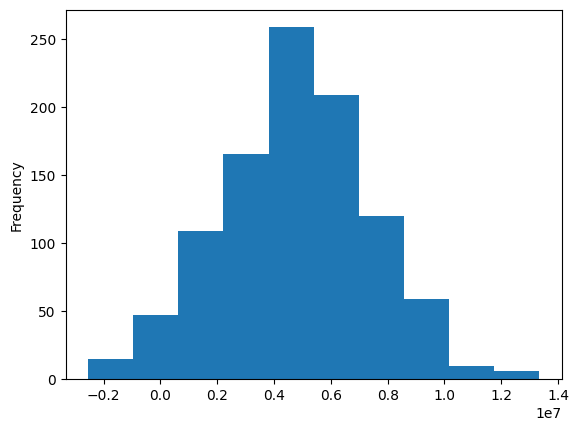

In [38]:
data_reg_1.plot(kind='hist')

<Axes: ylabel='Frequency'>

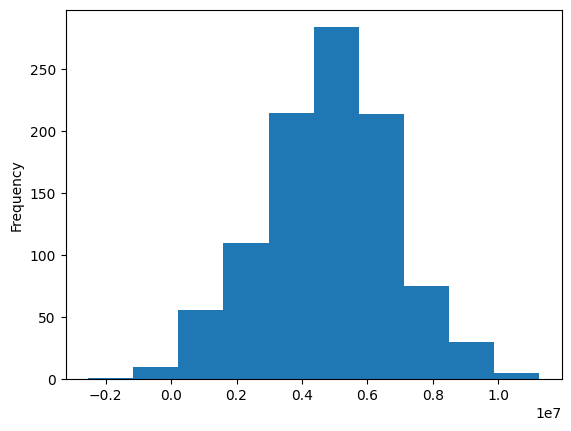

In [39]:
data_reg_2.plot(kind='hist')

<Axes: ylabel='Frequency'>

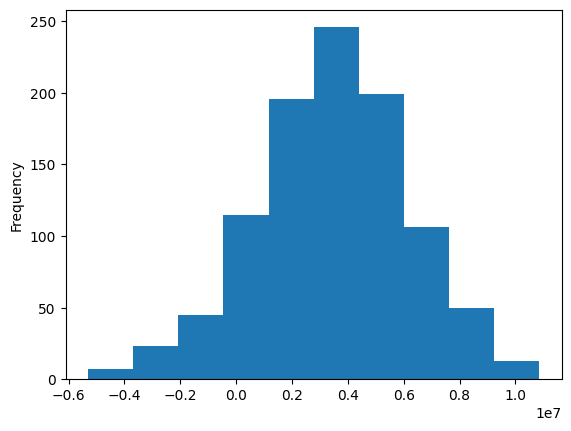

In [40]:
data_reg_3.plot(kind='hist')

In [41]:
print('REGION 0')
print(f'Intervalo de confianza entre {inter_05_reg1} y {inter_95_reg1}. Beneficio promedio es de {benef_prom_reg1} y la tasa de perdida es de {tasa_perd_reg1}')
print('REGION 1')
print(f'Intervalo de confianza entre {inter_05_reg2} y {inter_95_reg2}. Beneficio promedio es de {benef_prom_reg2} y la tasa de perdida es de {tasa_perd_reg2}')
print('REGION 2')
print(f'Intervalo de confianza entre {inter_05_reg3} y {inter_95_reg3}. Beneficio promedio es de {benef_prom_reg3} y la tasa de perdida es de {tasa_perd_reg3}')

REGION 0
Intervalo de confianza entre 323870.7404492938 y 9080052.892473852. Beneficio promedio es de 4774168.242664123 y la tasa de perdida es de 4.1000000000000005
REGION 1
Intervalo de confianza entre 1258062.8764825696 y 8030287.410072967. Beneficio promedio es de 4791901.613003319 y la tasa de perdida es de 0.8999999999999999
REGION 2
Intervalo de confianza entre -1062681.7434007681 y 7972601.450243218. Beneficio promedio es de 3434543.7658087574 y la tasa de perdida es de 9.9


# Conclusiones 


A primer vista y casi durante todo el proceso, la región 0 aparenta ser la mejor opción para invertir con una mayor cantidad de barriles y una ganancia estimada por encima de las otras 2 regiones. Sin embargo, durante el modelaje nos damos cuenta que el modelo que mejor predice es el modelo para la región 1 con un RECM de 0.8 lo cual es un buen indicador.
Después de analizar los resultados del bootstrapping y obtener diferentes metricas podemos ver que la cosa cambia... La región 1 es que mejor proyecta, con un beneficio promedio de  4791901.613003319 y una tasa de pérdida de 0.89 % . Lo que demuestra que no solamente es el mejor si no el único que cumple con el requisito de no más de 2.5% para la tasa de perdida. 

Despues de este analisis podemos concluir que la mejor opción de inversión es la región 1.